### Pierwsze spotkanie w semestrze letnim - ściąganie plików z internetu, rozpakowywanie zipów w Pythonie oraz proste operacje na folderach i plikach

##### Wczytujemy pakiety

In [3]:
import os #skrót od operating system - wiadomo o co chodzi
import os.path as op #podpakiet, również przydatny przy pracy z folderami/plikami/ścieżkami
import matplotlib.pyplot as plt
from urllib.request import urlretrieve # funkcja z pakietu urllib - służy do ściągania pliku/plików z internetu
import zipfile #pakiet do pracy na paczkach w formacie .zip
from PIL import Image #funkcja z pakietu PIL, przydatna jeśli chcemy wyświetlić jakiś obraz

###### Gdzie teraz jestem, czyli funkcja getcwd()

In [4]:
os.getcwd()

'/Users/Gacek/Documents/Python/Koło/s01_e07'

###### Zmiana ścieżki, czyli chdir()

In [5]:
os.chdir('/Users/Gacek/Documents/Python/Koło/')

###### Wyświetlanie zawartości danego folderu, czyli listdir()

In [6]:
os.listdir('s01_e06') #wyświetla zawartość konkretnego folderu

['.ipynb_checkpoints',
 's01_e06_before.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Untitled3.ipynb']

In [7]:
os.listdir() #wyświetla też zawartość miejsca, w którym się znajduję (jeśli nie podam żadnego argumentu)

['.DS_Store',
 '.ipynb_checkpoints',
 '1.ipynb',
 '2_download.ipynb',
 '3_robocza.ipynb',
 'bitstampUSD_1-min_data_2012-01-01_to_2017-10-20.csv.zip',
 'data_bitcoin.csv',
 'gpw.csv',
 'Issues',
 'PD2_rozw.ipynb',
 'prezes.png',
 'prezes1.png',
 's01_e02.ipynb',
 's01_e02_old.ipynb',
 's01_e03.ipynb',
 's01_e03_before.ipynb',
 's01_e04',
 's01_e05',
 's01_e06',
 's01_e07',
 's01_e99',
 's01_hw01',
 's01_pd01',
 's01_pd01_rozw.ipynb',
 's01_pd02',
 's01_pd02.ipynb',
 's01_pd02_nakole.ipynb',
 's01_pd03',
 's01_pd03.csv',
 's01_pd03.ipynb',
 's01_pd03_r.ipynb',
 's01_pd03_rozw.ipynb',
 'S01E01.ipynb',
 's01e04.ipynb',
 'Ściągajka.ipynb',
 'Testy.ipynb',
 'Trump.ipynb',
 'tweets.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Untitled3.ipynb',
 'Untitled4.ipynb',
 'wyzwanie_2.ipynb',
 'wyzwanie_2a.ipynb']

###### Funkcja chdir (zmiany ścieżki) nie zadziała, jeśli spróbujemy się przenieść do nieistniejącego folderu

In [9]:
os.chdir('/Users/Gacek/Documents/Python/Koło/s01_eee')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Gacek/Documents/Python/Koło/s01_eee'

In [10]:
mypath = '/Users/Gacek/Documents/Python/Koło/s01_eee'

###### funkcja exists() - sprawdza, czy miejsce do którego się odnoszę w ogóle istnieje

In [11]:
op.exists(mypath)

False

###### funkcja makedirs() - tworzenie nowych folderów

In [12]:
if not op.exists(mypath): #jeśli nieprawdą jest, że ten folder istnieje
    os.makedirs(mypath) #stwórz mi go!

In [13]:
op.exists(mypath) #funkcja exists zwróci teraz True, ponieważ wskazany folder już istnieje.

True

###### Zapisujemy do zmiennej ścieżkę, w której trzymamy wszystkie swoje pliki związane z kołem.

In [14]:
startdir = '/Users/Gacek/Documents/Python/Koło/'

###### Dzisiaj mamy spotkanie siódme (chyba), więc chciałbym przenieść się do folderu **s01e07** - przy pomocy funkcji join() mogę łatwo połączyć swoją ścieżkę początkową z konkretną nazwą folderu.

In [15]:
mydir = op.join(startdir, 's01_e07')

In [16]:
mydir

'/Users/Gacek/Documents/Python/Koło/s01_e07'

In [17]:
os.chdir(mydir) #zmieniam ścieżkę i przechodzę do wybranego folderu

In [19]:
os.listdir()

['!college-salaries',
 '.DS_Store',
 '.ipynb_checkpoints',
 's01_e07.ipynb',
 'Untitled.ipynb',
 'Untitled1-Copy1.ipynb',
 'Untitled1.ipynb']

###### Zapisujemy do zmiennej adres do naszych danych

In [20]:
myzip = 'https://github.com/kpswps/py/raw/master/datasets/college-salaries.zip'

###### definiujemy jak ma się nazywać plik, który zapiszemy u siebie na komputerze

In [21]:
zipname = 'college-salaries.zip'

###### Tworzymy pełną ścieżkę tego (nieistniejącego jeszcze) pliku 

In [24]:
filepath = op.join(os.getcwd(),zipname) #uwaga: funkcje możemy bezproblemowo zawijać w inne funkcje!

In [25]:
filepath

'/Users/Gacek/Documents/Python/Koło/s01_e07/college-salaries.zip'

###### Ściągamy plik z internetu - pierwszy argument funkcji to adres pliku, drugi zaś to adres miejsca, w którym ów plik zapisujemy

In [27]:
urlretrieve(myzip, filepath)

('/Users/Gacek/Documents/Python/Koło/s01_e07/college-salaries.zip',
 <http.client.HTTPMessage at 0x10669a438>)

In [29]:
os.listdir() #pojawił się nowy plik: college-salaries.zip

['!college-salaries',
 '.DS_Store',
 '.ipynb_checkpoints',
 'college-salaries.zip',
 's01_e07.ipynb',
 'Untitled.ipynb',
 'Untitled1-Copy1.ipynb',
 'Untitled1.ipynb']

In [30]:
with zipfile.ZipFile(zipname, 'r') as zip_ref: #otwieramy 'połączenie' z plikiem, zapisujemy je jako zip_ref
    zip_ref.extractall() #metoda .extractall() - wypakowuje wszystkie pliki z paczki zip.

###### Sprawdzamy zawartość naszego wypakowanego zipa

In [31]:
smietniczek = os.listdir('college-salaries')

In [32]:
smietniczek

['.DS_Store',
 'degrees-that-pay-back.csv',
 'hummus.jpg',
 'iranistykaIstopien╠ü_program.xls',
 'mg.jpg',
 'salaries-by-college-type.csv',
 'salaries-by-region.csv']

In [34]:
#wyświetlanie obrazów bezpośrednio w notatniku
%matplotlib inline 

In [35]:
imgdir = op.join(os.getcwd(),
                  'college-salaries',
                 smietniczek[2])

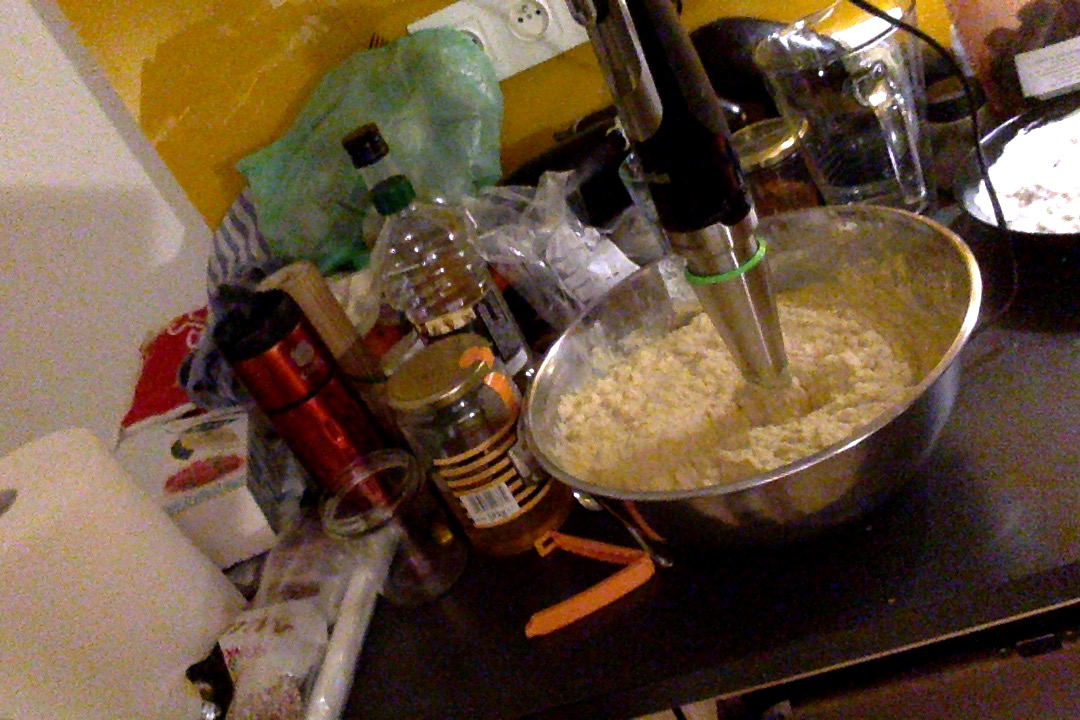

In [38]:
Image.open(imgdir, 'r') #wyświetlanie gustownych obrazów

###### W następnym odcinku: powtórka z warunków i pętli, wprowadzamy nowy typ zmiennej - słowniki. Oprócz tego list oraz dict comprhensions.